In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the Excel file
file_path = '/content/IT_Consulting_Deals_Data_India.xlsx'
data = pd.read_excel(file_path)


In [ ]:

# Display the first few rows and basic information to understand the structure of the data
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [ ]:
data['Deal Cost'].describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [ ]:
# Fill missing values in 'Client Category' with a placeholder
data.fillna({'Client Category':'Unknown' },inplace=True)

In [ ]:
data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [ ]:
data = data[data['Location'] != 'Others']

In [ ]:
data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
...,...,...,...,...,...,...,...,...,...
10055,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,Lost
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [ ]:
# Encode target variable
data['Deal Status Code'] = data['Deal Status Code'].map({'Won': 1, 'Lost': 0})

<ipython-input-35-d3477caf7f20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Deal Status Code'] = data['Deal Status Code'].map({'Won': 1, 'Lost': 0})


In [ ]:
data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,1
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1
...,...,...,...,...,...,...,...,...,...
10055,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,0
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,1


<ipython-input-37-c8a880e87ad2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_solutions.values, y=top_solutions.index, palette="viridis")


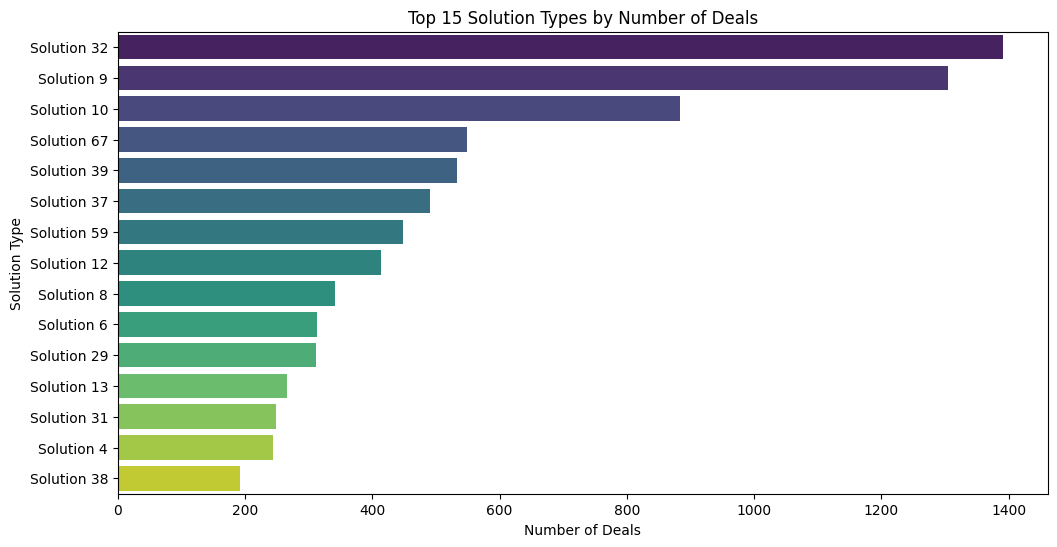

In [ ]:
# Count of deals by solution type (Top 15 Solutions)
import matplotlib.pyplot as plt
import seaborn as sns

# Count of deals by solution type (Top 15 Solutions)
plt.figure(figsize=(12, 6))  # Ensure matplotlib is imported as plt
top_solutions = data['Solution Type'].value_counts().nlargest(15)  # Extract top 15 solution types
sns.barplot(x=top_solutions.values, y=top_solutions.index, palette="viridis")
plt.title("Top 15 Solution Types by Number of Deals")
plt.xlabel("Number of Deals")
plt.ylabel("Solution Type")
plt.show()


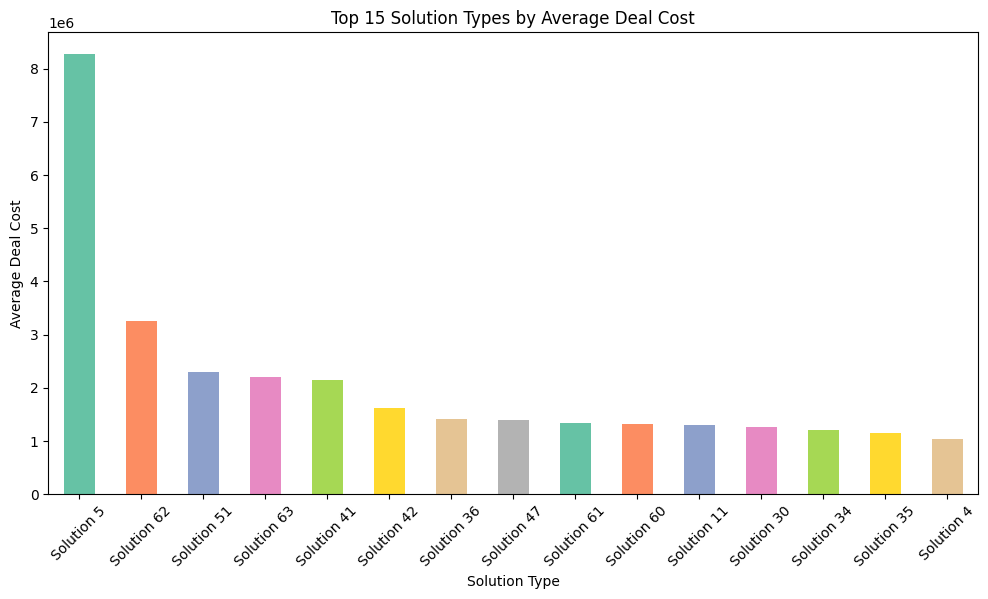

In [ ]:
# Top 15 Solution Types by Average Deal Cost
top_15_solutions = data.groupby('Solution Type')['Deal Cost'].mean().nlargest(15)
plt.figure(figsize=(12, 6))
top_15_solutions.plot(kind='bar', color=sns.color_palette("Set2", n_colors=15))
plt.title("Top 15 Solution Types by Average Deal Cost")
plt.xlabel("Solution Type")
plt.ylabel("Average Deal Cost")
plt.xticks(rotation=45)
plt.show()

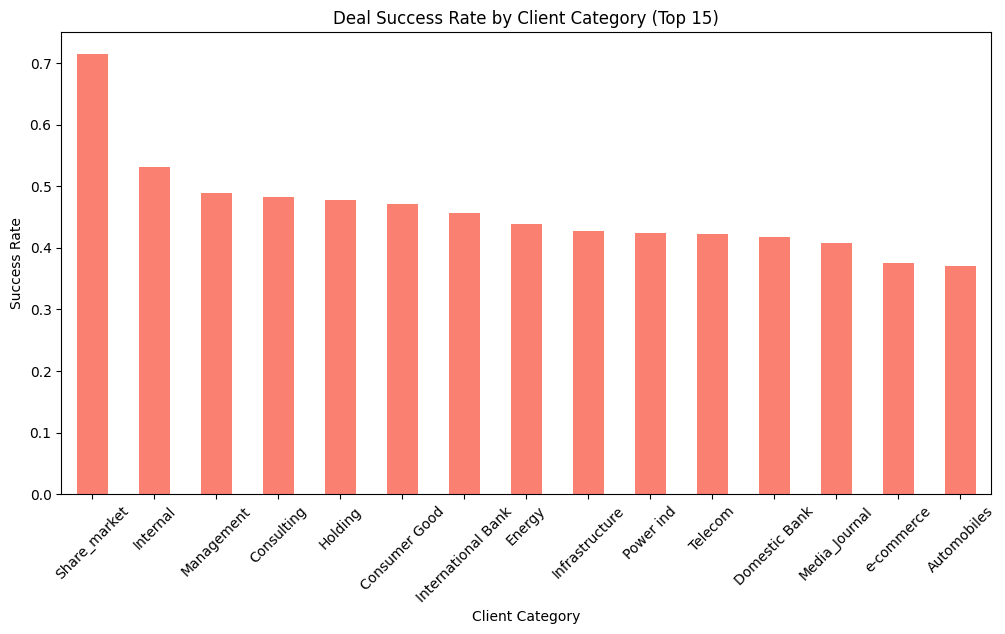

In [ ]:
# Deal Success Rate by Client Category
client_category_success = data.groupby('Client Category')['Deal Status Code'].mean().sort_values(ascending=False).head(15) # Changed 'Deal Status' to 'Deal Status Code'
plt.figure(figsize=(12, 6))
client_category_success.plot(kind='bar', color='salmon')
plt.title("Deal Success Rate by Client Category (Top 15)")
plt.xlabel("Client Category")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.show()

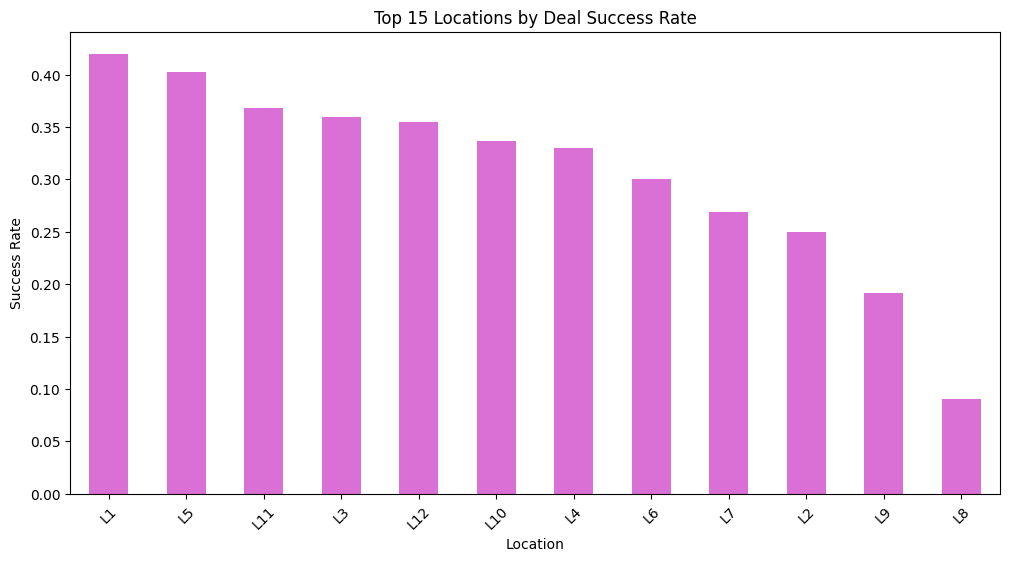

In [ ]:

# Deal Success Rate by Location (Top 15 Locations)
location_success = data.groupby('Location')['Deal Status Code'].mean().nlargest(15)
plt.figure(figsize=(12, 6))
location_success.plot(kind='bar', color='orchid')
plt.title("Top 15 Locations by Deal Success Rate")
plt.xlabel("Location")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Check the distribution of Deal Status Code
status_counts = data['Deal Status Code'].value_counts()
status_ratio = status_counts[1] / status_counts[0] if status_counts[0] != 0 else "Undefined (No 'Lost' cases)"

print("Counts of Deal Status Code:")
print(status_counts)
print("\nRatio of 'Won' to 'Lost':")
print(status_ratio)


Counts of Deal Status Code:
Deal Status Code
0    5880
1    3364
Name: count, dtype: int64

Ratio of 'Won' to 'Lost':
0.572108843537415


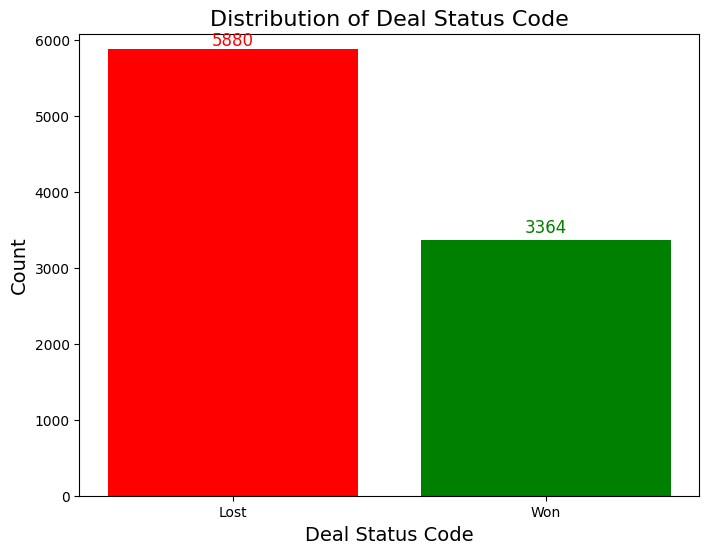

In [ ]:
import matplotlib.pyplot as plt

# Count the number of "Won" and "Lost"
status_counts = data['Deal Status Code'].value_counts()

# Calculate the ratio
status_ratio = status_counts[1] / status_counts[0] if status_counts[0] != 0 else None

# Plot the counts
plt.figure(figsize=(8, 6))
plt.bar(['Lost', 'Won'], status_counts, color=['red', 'green'])
plt.title('Distribution of Deal Status Code', fontsize=16)
plt.xlabel('Deal Status Code', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.text(0, status_counts[0] + 50, f'{status_counts[0]}', ha='center', fontsize=12, color='red')
plt.text(1, status_counts[1] + 100, f'{status_counts[1]}', ha='center', fontsize=12, color='green')
plt.ylim(0, max(status_counts) + 200)
plt.show()


In [ ]:
import numpy as np

# Calculate the IQR
Q1 = data['Deal Cost'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Deal Cost'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = data[(data['Deal Cost'] >= lower_bound) & (data['Deal Cost'] <= upper_bound)]

print(f"Original dataset size: {len(data)}")
print(f"Filtered dataset size: {len(filtered_data)}")


Original dataset size: 9244
Filtered dataset size: 8414


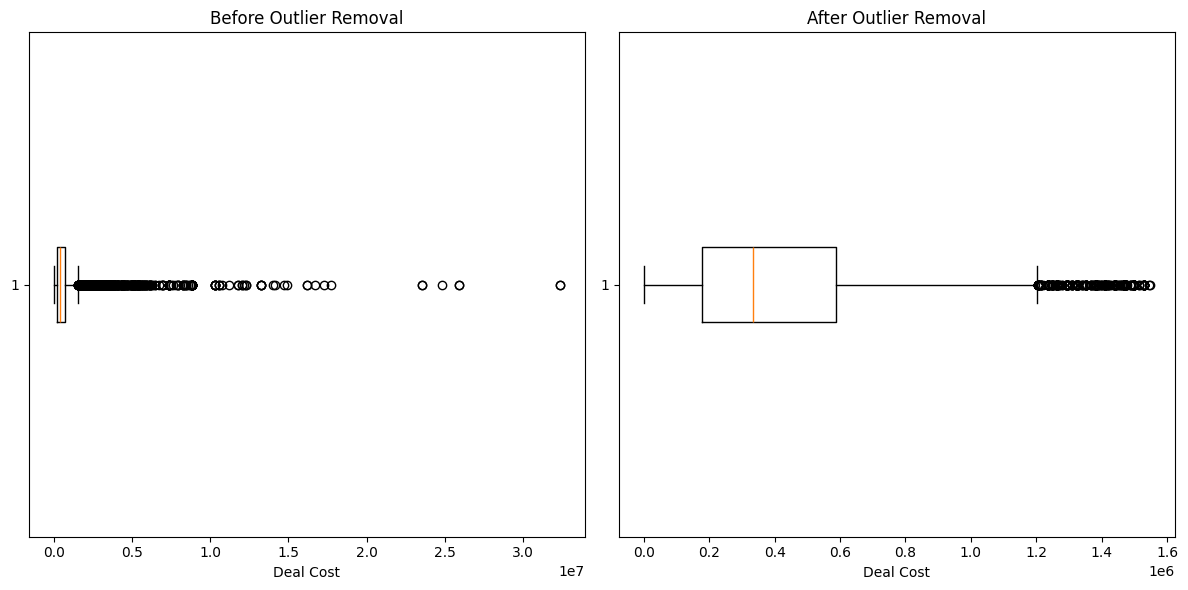

In [ ]:
import matplotlib.pyplot as plt

# Plot before and after
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['Deal Cost'], vert=False)
plt.title('Before Outlier Removal')
plt.xlabel('Deal Cost')

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data['Deal Cost'], vert=False)
plt.title('After Outlier Removal')
plt.xlabel('Deal Cost')

plt.tight_layout()
plt.show()


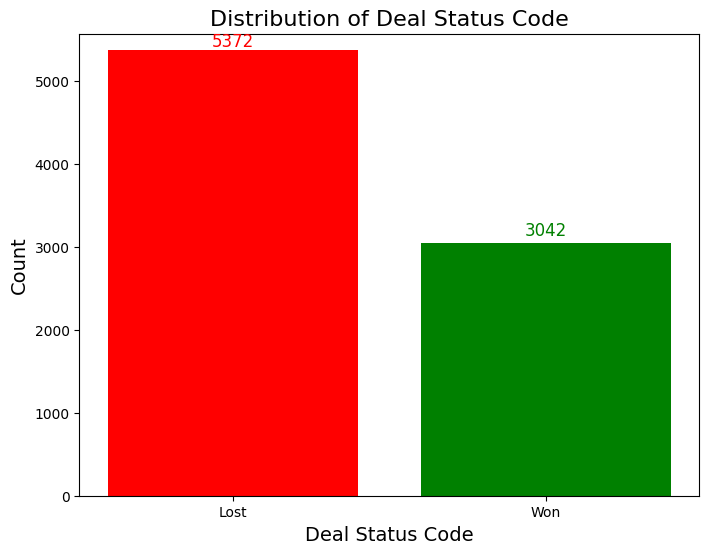

In [ ]:
import matplotlib.pyplot as plt

# Count the number of "Won" and "Lost"
status_counts = filtered_data['Deal Status Code'].value_counts()

# Calculate the ratio
status_ratio = status_counts[1] / status_counts[0] if status_counts[0] != 0 else None

# Plot the counts
plt.figure(figsize=(8, 6))
plt.bar(['Lost', 'Won'], status_counts, color=['red', 'green'])
plt.title('Distribution of Deal Status Code', fontsize=16)
plt.xlabel('Deal Status Code', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.text(0, status_counts[0] + 50, f'{status_counts[0]}', ha='center', fontsize=12, color='red')
plt.text(1, status_counts[1] + 100, f'{status_counts[1]}', ha='center', fontsize=12, color='green')
plt.ylim(0, max(status_counts) + 200)
plt.show()


# Feature Engineering

In [ ]:
# Step 1: Remove Manager Details
# 1.1: View the current distribution of Manager Name
manager_counts = filtered_data['Manager Name'].value_counts()
print("Before handling Manager Name:")
print(manager_counts)

# 1.2: Set threshold for rare categories and apply to 'Manager Name'
threshold = 5  # Threshold to group rare categories as 'Other'
filtered_data['Manager Name'] = filtered_data['Manager Name'].apply(
    lambda x: x if manager_counts[x] >= threshold else 'Other'
)

# 1.3: View the updated distribution of Manager Name
print("After handling Manager Name:")
print(filtered_data['Manager Name'].value_counts())

Before handling Manager Name:
Manager Name
Molly Eakes        294
Rudraksh Sharma    249
Manpreet Singh     173
Gayle Molter       171
Rayford Durgan     163
                  ... 
Palmer Holmberg      1
Lokesh Pinani        1
Natalia Dumlao       1
Rahul Singh          1
Uzaar Ali            1
Name: count, Length: 264, dtype: int64
After handling Manager Name:
Manager Name
Molly Eakes        294
Rudraksh Sharma    249
Manpreet Singh     173
Gayle Molter       171
Other              169
                  ... 
birender mandal      5
Mayank Praveen       5
Upendra Bhatt        5
Himanshu Daga        5
Edmund Brigham       5
Name: count, Length: 188, dtype: int64


<ipython-input-46-73a845a776b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Manager Name'] = filtered_data['Manager Name'].apply(


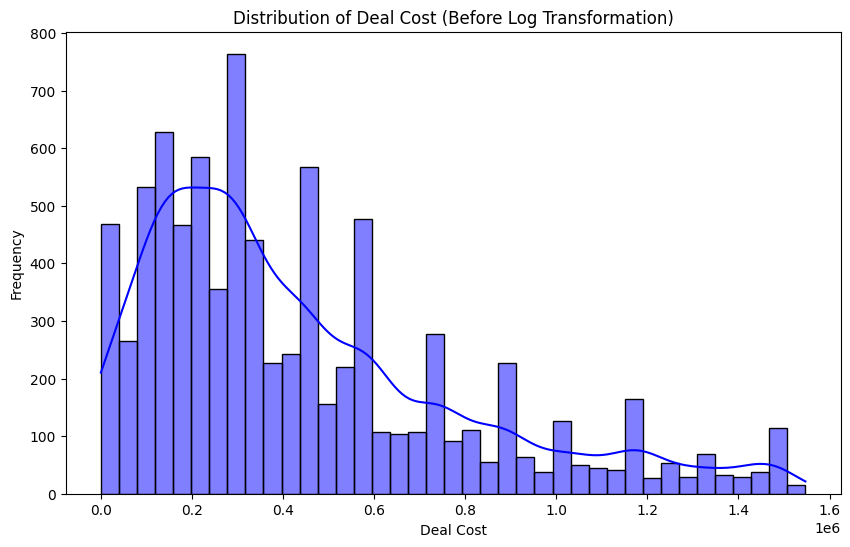

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'Deal Cost' before log transformation
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Deal Cost'], kde=True, color='blue')
plt.title('Distribution of Deal Cost (Before Log Transformation)')
plt.xlabel('Deal Cost')
plt.ylabel('Frequency')
plt.show()


<ipython-input-48-bc6ef984274b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Log Deal Cost'] = np.log1p(filtered_data['Deal Cost'])


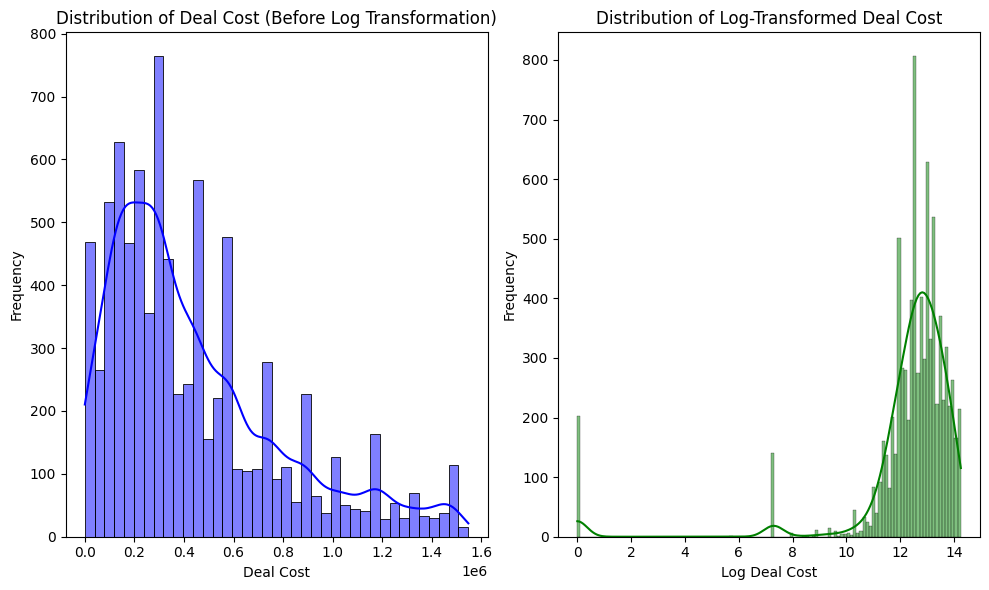

In [ ]:
# Apply log transformation to Deal Cost
filtered_data['Log Deal Cost'] = np.log1p(filtered_data['Deal Cost'])

# Plot the distribution of 'Deal Cost' after log transformation
plt.figure(figsize=(10, 6))

# Before log transformation
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['Deal Cost'], kde=True, color='blue')
plt.title('Distribution of Deal Cost (Before Log Transformation)')
plt.xlabel('Deal Cost')
plt.ylabel('Frequency')

# After log transformation
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['Log Deal Cost'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Deal Cost')
plt.xlabel('Log Deal Cost')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
filtered_data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Log Deal Cost
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,11.918397
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,13.520746
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,1,13.173394
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,12.923197
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1,13.847352
...,...,...,...,...,...,...,...,...,...,...
10054,Telecom,Solution 4,2019-01-23,Sector 24,L5,Rahul Bajpai,Abhiskek Kumar,58823.53,1,10.982314
10055,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,0,13.621356
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,13.284884
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,13.284884


In [ ]:
from scipy.stats import skew, kurtosis

# Check skewness and kurtosis
print(f"Skewness of Deal Cost: {skew(filtered_data['Log Deal Cost'])}")
print(f"Kurtosis of Deal Cost: {kurtosis(filtered_data['Log Deal Cost'])}")


Skewness of Deal Cost: -4.244055377600147
Kurtosis of Deal Cost: 20.19495946094164


<ipython-input-51-c7bcffa935a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BoxCox Deal Cost'], lambda_param = boxcox(filtered_data['Deal Cost'] + 1)
<ipython-input-51-c7bcffa935a5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Winsorized Deal Cost'] = filtered_data['Deal Cost'].clip(lower=lower_percentile, upper=upper_percentile)


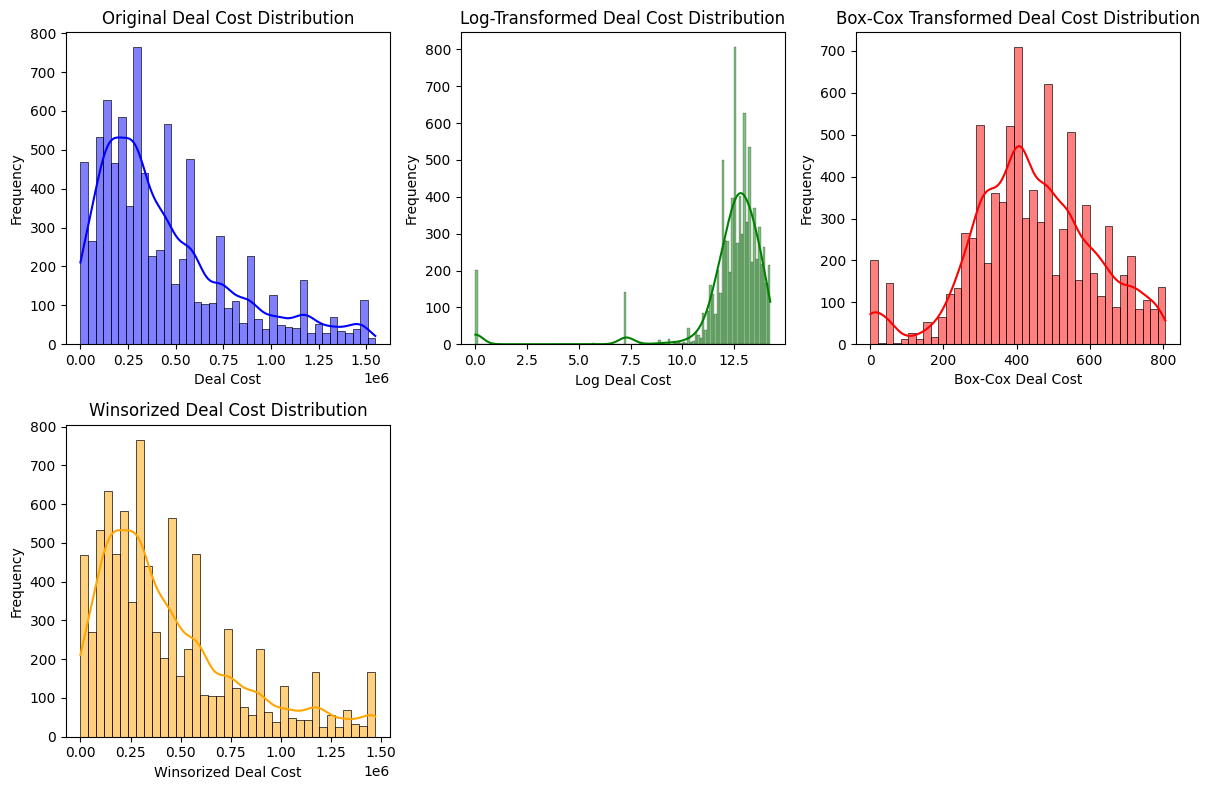

Skewness of Deal Cost (Box-Cox): -0.21082555727898475
Kurtosis of Deal Cost (Box-Cox): 0.1413128491279192
Skewness of Deal Cost (Winsorized): 1.1335952865601697
Kurtosis of Deal Cost (Winsorized): 0.6772318892697959


In [ ]:
from scipy.stats import boxcox
import numpy as np

# Step 1: Apply Box-Cox Transformation (for positive skew)
# Note: Deal Cost must be positive, so we add 1 to avoid zero or negative values
filtered_data['BoxCox Deal Cost'], lambda_param = boxcox(filtered_data['Deal Cost'] + 1)

# Step 2: Identify and handle outliers using Winsorization (cap at 1st and 99th percentiles)
lower_percentile = filtered_data['Deal Cost'].quantile(0.01)
upper_percentile = filtered_data['Deal Cost'].quantile(0.99)

filtered_data['Winsorized Deal Cost'] = filtered_data['Deal Cost'].clip(lower=lower_percentile, upper=upper_percentile)

# Plot the distributions before and after transformations
plt.figure(figsize=(12, 8))

# Original Deal Cost Distribution
plt.subplot(2, 3, 1)
sns.histplot(filtered_data['Deal Cost'], kde=True, color='blue')
plt.title('Original Deal Cost Distribution')
plt.xlabel('Deal Cost')
plt.ylabel('Frequency')

# Log-Transformed Deal Cost Distribution
plt.subplot(2, 3, 2)
sns.histplot(filtered_data['Log Deal Cost'], kde=True, color='green')
plt.title('Log-Transformed Deal Cost Distribution')
plt.xlabel('Log Deal Cost')
plt.ylabel('Frequency')

# Box-Cox Transformed Deal Cost Distribution
plt.subplot(2, 3, 3)
sns.histplot(filtered_data['BoxCox Deal Cost'], kde=True, color='red')
plt.title('Box-Cox Transformed Deal Cost Distribution')
plt.xlabel('Box-Cox Deal Cost')
plt.ylabel('Frequency')

# Winsorized Deal Cost Distribution
plt.subplot(2, 3, 4)
sns.histplot(filtered_data['Winsorized Deal Cost'], kde=True, color='orange')
plt.title('Winsorized Deal Cost Distribution')
plt.xlabel('Winsorized Deal Cost')
plt.ylabel('Frequency')

# Show all plots
plt.tight_layout()
plt.show()

# Check skewness and kurtosis for each transformation
print(f"Skewness of Deal Cost (Box-Cox): {skew(filtered_data['BoxCox Deal Cost'])}")
print(f"Kurtosis of Deal Cost (Box-Cox): {kurtosis(filtered_data['BoxCox Deal Cost'])}")

print(f"Skewness of Deal Cost (Winsorized): {skew(filtered_data['Winsorized Deal Cost'])}")
print(f"Kurtosis of Deal Cost (Winsorized): {kurtosis(filtered_data['Winsorized Deal Cost'])}")


In [ ]:
filtered_data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Log Deal Cost,BoxCox Deal Cost,Winsorized Deal Cost
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,11.918397,310.849731,150000.00
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,13.520746,598.732730,744705.88
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,1,13.173394,519.523991,526176.47
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,12.923197,469.018932,409705.88
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1,13.847352,684.142989,1032352.94
...,...,...,...,...,...,...,...,...,...,...,...,...
10054,Telecom,Solution 4,2019-01-23,Sector 24,L5,Rahul Bajpai,Abhiskek Kumar,58823.53,1,10.982314,211.643600,58823.53
10055,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,0,13.621356,623.844468,823529.41
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,13.284884,543.738982,588235.29
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,13.284884,543.738982,588235.29


<ipython-input-53-b1dc4ef23e18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Deal Date'] = pd.to_datetime(filtered_data['Deal Date'])
<ipython-input-53-b1dc4ef23e18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Deal Year'] = filtered_data['Deal Date'].dt.year
<ipython-input-53-b1dc4ef23e18>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

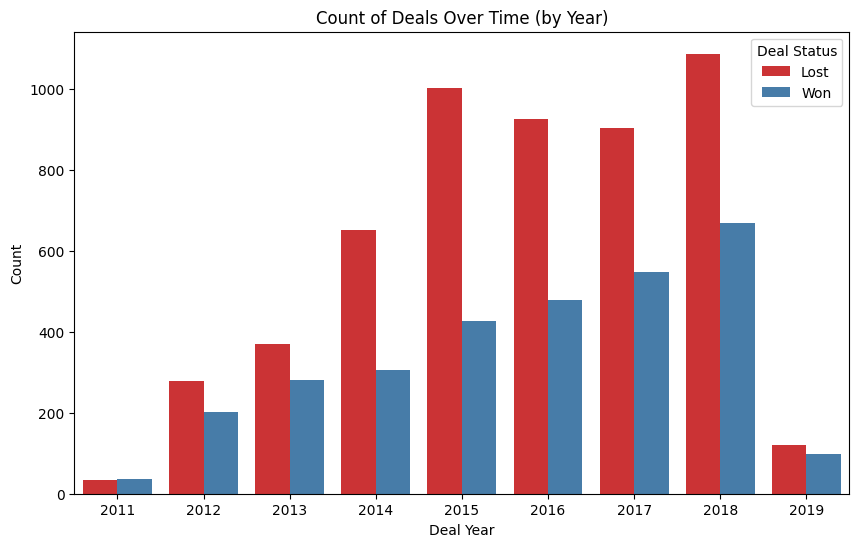

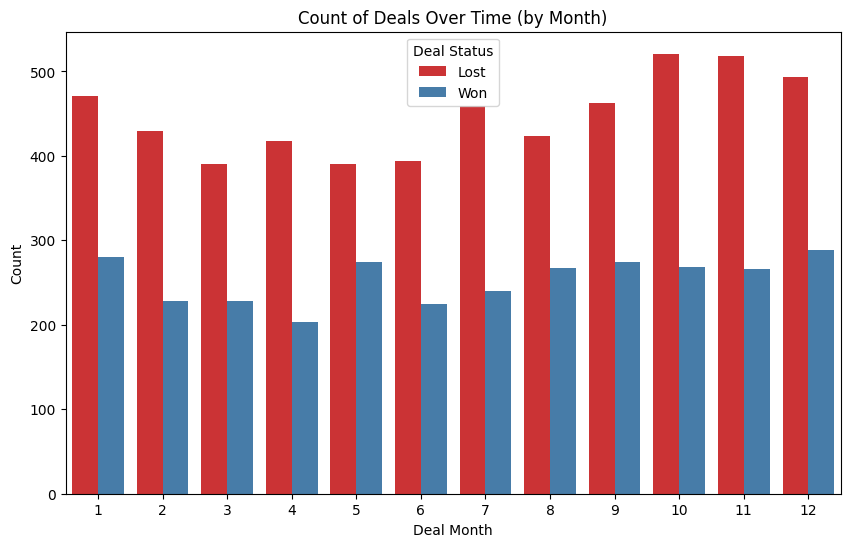

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Deal Date to datetime if not already done
filtered_data['Deal Date'] = pd.to_datetime(filtered_data['Deal Date'])

# Add new time-based features
filtered_data['Deal Year'] = filtered_data['Deal Date'].dt.year
filtered_data['Deal Month'] = filtered_data['Deal Date'].dt.month
filtered_data['Deal Quarter'] = filtered_data['Deal Date'].dt.quarter

# 1. Count of Deals over Time (by Year)
plt.figure(figsize=(10, 6))
sns.countplot(x='Deal Year', data=filtered_data, hue='Deal Status Code', palette="Set1")
plt.title('Count of Deals Over Time (by Year)')
plt.xlabel('Deal Year')
plt.ylabel('Count')
plt.legend(title='Deal Status', labels=['Lost', 'Won'])
plt.show()

# 2. Count of Deals over Time (by Month)
plt.figure(figsize=(10, 6))
sns.countplot(x='Deal Month', data=filtered_data, hue='Deal Status Code', palette="Set1")
plt.title('Count of Deals Over Time (by Month)')
plt.xlabel('Deal Month')
plt.ylabel('Count')
plt.legend(title='Deal Status', labels=['Lost', 'Won'])
plt.show()




In [ ]:
# Drop the 'Deal Date' column
filtered_data = filtered_data.drop(columns=['Deal Date'])

# Verify the changes
filtered_data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Log Deal Cost,BoxCox Deal Cost,Winsorized Deal Cost,Deal Year,Deal Month,Deal Quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,11.918397,310.849731,150000.00,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,13.520746,598.732730,744705.88,2012,9,3
6,Internal,Solution 59,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,1,13.173394,519.523991,526176.47,2011,11,4
7,Govt,Solution 7,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,12.923197,469.018932,409705.88,2012,9,3
8,Consumer Good,Solution 42,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1,13.847352,684.142989,1032352.94,2012,4,2


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
filtered_data[['Deal Cost', 'Log Deal Cost']] = scaler.fit_transform(filtered_data[['Deal Cost', 'Log Deal Cost']])
filtered_data[['Deal Cost', 'BoxCox Deal Cost']] = scaler.fit_transform(filtered_data[['Deal Cost', 'BoxCox Deal Cost']])

# Verify the changes
filtered_data.head()


,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Log Deal Cost,BoxCox Deal Cost,Winsorized Deal Cost,Deal Year,Deal Month,Deal Quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,-0.823964,1,-0.183292,-0.760299,150000.00,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.864308,1,0.537118,0.936666,744705.88,2012,9,3
6,Internal,Solution 59,Sector 2,L10,Mervin Harwood,rahul sharma,0.243939,1,0.380950,0.469759,526176.47,2011,11,4
7,Govt,Solution 7,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,-0.086701,0,0.268462,0.172051,409705.88,2012,9,3
8,Consumer Good,Solution 42,Sector 12,L10,Lilli Storrs,Md. Daud,1.680891,1,0.683958,1.440128,1032352.94,2012,4,2


In [ ]:
# Step 1: One-Hot Encoding the categorical features
categorical_columns = ['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name', 'Manager Name']
filtered_data = pd.get_dummies(filtered_data, columns=categorical_columns, drop_first=True)

# Step 2: Drop the unnecessary columns (except the target column 'Deal Status Code')
columns_to_drop = ['Deal Cost', 'Log Deal Cost', 'Winsorized Deal Cost', 'Deal Year', 'Deal Month', 'Deal Quarter']

filtered_data.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
print(filtered_data.head())


   Deal Status Code  BoxCox Deal Cost  Client Category_Automobiles  \
0                 1         -0.760299                        False   
1                 1          0.936666                        False   
6                 1          0.469759                        False   
7                 0          0.172051                        False   
8                 1          1.440128                        False   

   Client Category_Consulting  Client Category_Consumer Good  \
0                       False                          False   
1                       False                          False   
6                       False                          False   
7                       False                          False   
8                       False                           True   

   Client Category_Domestic Bank  Client Category_Domestic Private Bank  \
0                          False                                  False   
1                          False            

In [ ]:
filtered_data

,Deal Status Code,BoxCox Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,...,Manager Name_ramdin verma,Manager Name_riyasat ali,Manager Name_rohit,Manager Name_shafibul,Manager Name_sheak shakir,Manager Name_shiv kumar,Manager Name_shyam kumar,Manager Name_sunder paal,Manager Name_vansu dev,Manager Name_vinit katariya
0,1,-0.760299,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.936666,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,0.469759,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,0.172051,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,1.440128,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,1,-1.345082,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10055,0,1.084690,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10056,0,0.612498,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10058,0,0.612498,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate features (X) and target variable (y)
X = filtered_data.drop('Deal Status Code', axis=1)  # Exclude the target column
y = filtered_data['Deal Status Code']              # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())


# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())




Class distribution before SMOTE:
Deal Status Code
0    4315
1    2416
Name: count, dtype: int64
Class distribution after SMOTE:
Deal Status Code
0    4315
1    4315
Name: count, dtype: int64


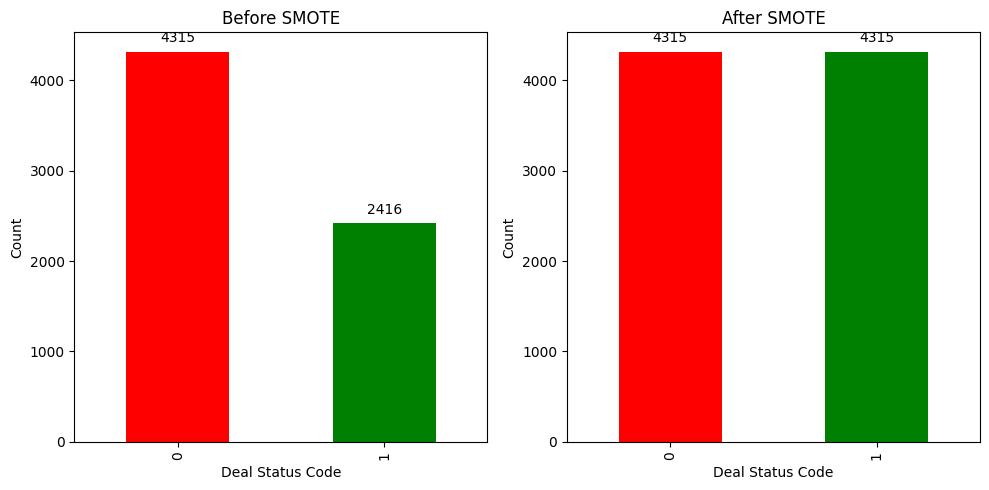

In [ ]:
import matplotlib.pyplot as plt

# Before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax1 = y_train.value_counts().plot(kind='bar', color=['red', 'green'], title='Before SMOTE')
plt.xlabel('Deal Status Code')
plt.ylabel('Count')

# Display the counts on top of the bars for the "Before SMOTE" plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# After SMOTE
plt.subplot(1, 2, 2)
ax2 = pd.Series(y_train_smote).value_counts().plot(kind='bar', color=['red', 'green'], title='After SMOTE')
plt.xlabel('Deal Status Code')
plt.ylabel('Count')

# Display the counts on top of the bars for the "After SMOTE" plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
filtered_data

,Deal Status Code,BoxCox Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,...,Manager Name_ramdin verma,Manager Name_riyasat ali,Manager Name_rohit,Manager Name_shafibul,Manager Name_sheak shakir,Manager Name_shiv kumar,Manager Name_shyam kumar,Manager Name_sunder paal,Manager Name_vansu dev,Manager Name_vinit katariya
0,1,-0.760299,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.936666,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,0.469759,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,0.172051,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,1.440128,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,1,-1.345082,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10055,0,1.084690,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10056,0,0.612498,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10058,0,0.612498,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest model on the SMOTE data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)






Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1057
           1       0.86      0.62      0.72       626

    accuracy                           0.82      1683
   macro avg       0.83      0.78      0.79      1683
weighted avg       0.83      0.82      0.81      1683

Accuracy Score: 0.8206


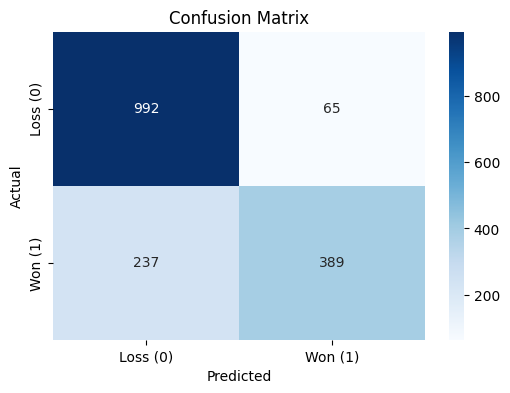

In [ ]:
# Evaluate the model
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss (0)', 'Won (1)'], yticklabels=['Loss (0)', 'Won (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

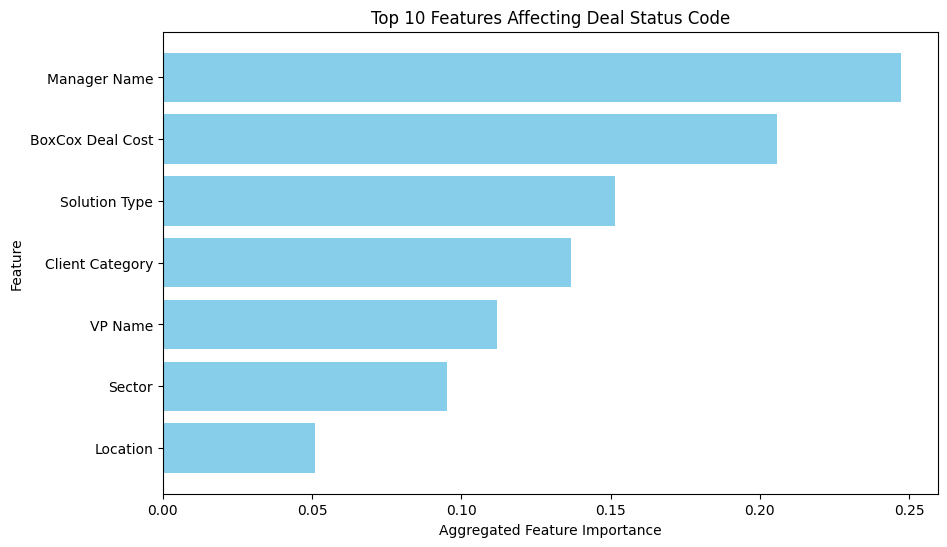

In [ ]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
feature_importance_data = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

# Aggregate feature importances for original categorical columns
feature_importance_data['Original Feature'] = feature_importance_data['Feature'].str.split('_').str[0]
aggregated_importances = feature_importance_data.groupby('Original Feature')['Importance'].sum().reset_index()

# Sort and filter top 10 important features
top_features = aggregated_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot the aggregated feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Original Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Aggregated Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Affecting Deal Status Code')
plt.gca().invert_yaxis()
plt.show()